<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [25]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup
import requests

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [107]:
# read in the csv
file = 'job_listings.csv'

# specifying only the inclusion of title and description 
df = pd.read_csv(file, usecols=['title', 'description'])[['title', 'description']]

# check 
df.head()

,title,description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...


In [108]:
# check shape 
df.shape

(426, 2)

In [109]:
# clean the data
html_doc = df['description'][0]

# remove the messy stuff from every row in the description column
df['description'] = [BeautifulSoup(text, 'html').text for text in df.description]

# drop the b and other unnecessary characters 
# using a function
def rid_b(text):
    return text[2::].replace('\\n', '')

# apply function to description column
df['description'] = [rid_b(text) for text in df.description]

# check df
df.head()

,title,description
0,Data scientist,Job Requirements:Conceptual understanding in M...
1,Data Scientist I,"Job DescriptionAs a Data Scientist 1, you will..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations2...


In [110]:
# remove unicode stuff
def remove_unicode(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')
    return df

# apply function to df
df = remove_unicode(df)
#check
df.head()

,title,description
0,Data scientist,Job Requirements:Conceptual understanding in M...
1,Data Scientist I,"Job DescriptionAs a Data Scientist 1, you will..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA multiple locations2+ years o...


In [100]:
df.head()

,Unnamed: 0,description,title,lemmas,lemmas_str,vectorized
0,0,Job Requirements:Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ...","['job', 'requirement', 'conceptual', 'understa...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I,"[job, DescriptionAs, Data, scientist, help, bu...","['job', 'DescriptionAs', 'Data', 'scientist', ...","[1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, ..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res...","['Data', 'scientist', 'work', 'consult', 'busi...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, ..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[4,969, 6,756, monthcontractunder, general, su...","['4,969', '6,756', 'monthcontractunder', 'gene...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, ..."
4,4,Location: USA multiple locations2+ years o...,Data Scientist,"[location, USA, , multiple, locations2, ye...","['location', 'USA', ' ', 'multiple', 'locat...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [89]:
# make a copy of df as df2
df2 = df

In [90]:
# check
"""
we only need description and title so ill go back and remove the other columns.
"""
df2.head()

,Unnamed: 0,description,title
0,0,Job Requirements:Conceptual understanding in M...,Data scientist
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,4,Location: USA multiple locations2+ years o...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [91]:
##### Your Code Here #####
"""
First attempt. 
"""

# instantiate model
nlp = spacy.load('en_core_web_lg')

stop_words = []

STOP_WORDS = nlp.Defaults.stop_words.union(stop_words)

# add lemma
num_patterns = []
emp_patterns = []

lemmas = []

for i in nlp.pipe(df['description'], batch_size=500):
    doc_lemma = []
    for token in i:
        if (not token.is_stop # no stop words 
            and not token.is_punct # no punctuation 
            and token.pos_ != 'PRON' # no pronouns
            and len(token.lemma_) >= 3 # no 1-2 letter words
            and token.lemma_ not in STOP_WORDS):
                doc_lemma.append(token.lemma_)
    lemmas.append(doc_lemma)

assert len(lemmas) == df.shape[0]

# create lemmas column
df2['lemmas'] = lemmas

In [92]:
# assert tokenization was applied
df2.head()

,Unnamed: 0,description,title,lemmas
0,0,Job Requirements:Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ..."
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I,"[job, DescriptionAs, Data, scientist, help, bu..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[4,969, 6,756, monthcontractunder, general, su..."
4,4,Location: USA multiple locations2+ years o...,Data Scientist,"[location, USA, , multiple, locations2, ye..."


In [93]:
# check shape
df2.shape

(426, 4)

In [111]:
"""
Re-tokenizing the df, from scratch.
"""
# token
nlp = spacy.load("en_core_web_lg")

# stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'science'])

# no punctuation
df['tokens'] = df['description'].apply(lambda x: 
                                       [token.lemma_ for token in nlp(x) if (token not in STOP_WORDS) and (token.is_punct != True)])
# sample 10 to use 
df.sample(10)

,title,description,tokens
382,Data Scientist,DATA SCIENTISTJOB DESCRIPTIONABOUT USAmplion s...,"[data, SCIENTISTJOB, DESCRIPTIONABOUT, USAmpli..."
184,Associate Data Scientist,"Overview and ResponsibilitiesIn this role, you...","[overview, and, responsibilitiesin, this, role..."
135,People Data Scientist,Paradigm is a strategy firm that partners with...,"[Paradigm, be, a, strategy, firm, that, partne..."
188,Senior Data Scientist,Conducts research using advanced statistical a...,"[conduct, research, use, advanced, statistical..."
276,"Data Scientist, Infrastructure",Facebook's mission is to give people the power...,"[Facebook, 's, mission, be, to, give, people, ..."
113,Data Scientist- Corporate,People who personify our drive to exceed ex...,"[ , People, who, personify, -PRON-, drive, t..."
207,Geospatial Data Scientist,"$100,000 - $125,000 a yearDescription:Chesapea...","[$, 100,000, $, 125,000, a, yeardescription, C..."
283,"Data Scientist, AMP Analytics & Data Products","SummaryPosted: Mar 15, 2019Role Number: 200041...","[SummaryPosted, Mar, 15, 2019role, number, 200..."
26,WTE Data Science Engineer,"SummaryPosted: Mar 6, 2019Weekly Hours: 40Role...","[SummaryPosted, Mar, 6, 2019weekly, hour, 40ro..."
318,Data Scientist,OverviewThis position is responsible for aidin...,"[overviewthis, position, be, responsible, for,..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [94]:
##### Your Code Here #####

# Vectorize the df
vect = CountVectorizer(stop_words='english')

# fit df2 into the vectorizer
vect.fit(df2)

# get sparse dtm(Document Term Matrix)
dtm = vect.transform(df2)

# convert into a DataFrame that is condensed 
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [95]:
# check 
dtm.head()

,description,lemmas,title,unnamed
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0


In [96]:
# check shape
dtm.shape

(4, 4)

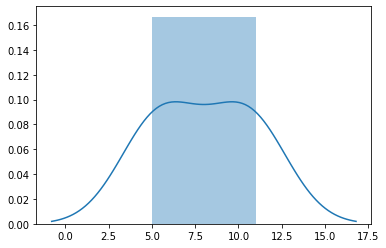

In [97]:
# plot dist graph
doc_len = [len(doc) for doc in df2]

# plot
sns.distplot(doc_len) 

# hmhmhm, i think i did something wrong but im not sure, yet.

In [98]:
# check features selected
print(vect.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>


In [99]:
"""
Re-doing it again in a different way.
"""
# create a column of lemmas as a str type
# without this, the function will not work 
df2['lemmas_str'] = df2['lemmas'].astype(str)

# vectorizing again
# will create a function that vectorizes, create a new column in df2 and, apply the vectorization to it.
def vector(text):
    cv = CountVectorizer()
    fit_transform = cv.fit_transform([text])
    vectorized = fit_transform.toarray().sum(axis=0) # return as an array, not matrix.
    return vectorized

# apply to df2['vectorized']
df2['vectorized'] = [vector(text) for text in df2.lemmas_str]

# check 
df2.head()

#### This way did not work as well ###

,Unnamed: 0,description,title,lemmas,lemmas_str,vectorized
0,0,Job Requirements:Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ...","['job', 'requirement', 'conceptual', 'understa...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I,"[job, DescriptionAs, Data, scientist, help, bu...","['job', 'DescriptionAs', 'Data', 'scientist', ...","[1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, ..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res...","['Data', 'scientist', 'work', 'consult', 'busi...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, ..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[4,969, 6,756, monthcontractunder, general, su...","['4,969', '6,756', 'monthcontractunder', 'gene...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, ..."
4,4,Location: USA multiple locations2+ years o...,Data Scientist,"[location, USA, , multiple, locations2, ye...","['location', 'USA', ' ', 'multiple', 'locat...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [112]:
"""
Another vectorization attempt.
"""
# vectorize 
cv = CountVectorizer()

# fit and transform the description column only
dtm = cv.fit_transform(df['description'])

# todense, matrix
vectorized = pd.DataFrame(dtm.todense(), columns=cv.get_feature_names())

# check
vectorized.head() # nice. 

,00,000,000pay,02115job,03,0356,04,062,06366,08,...,zenreach,zero,zeus,zf,zheng,zillow,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

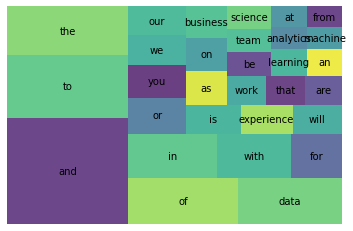

In [127]:
##### Your Code Here #####

# create a visual using squarify
word_rank = vectorized.sum().sort_values(ascending=False)

# plot 
squarify.plot(sizes=word_rank.values[:30], label=word_rank.index[:30], alpha=0.8)
plt.axis('off')
plt.show(); # hmhmhm, this not what i want.

In [123]:
from collections import Counter

soup_token = ''
for i in df['tokens']:
    soup_token += str(i)
    
# use counter, another method to create visuals
split_it = soup_token.split()
Counter = Counter(split_it)
word_rank = Counter.most_common(50)
print(word_rank)

[("'and',", 11555), ("'to',", 6924), ("'-PRON-',", 6368), ("'the',", 5379), ("'of',", 4606), ("'be',", 3626), ("'in',", 3612), ("'a',", 3539), ("'with',", 3058), ("'datum',", 2653), ("'for',", 2061), ("'or',", 1747), ("'", 1606), ("',", 1606), ("'work',", 1486), ("'will',", 1478), ("'experience',", 1366), ("'team',", 1249), ("'as',", 1237), ("'on',", 1201), ("'business',", 1147), ("'that',", 1023), ("'data',", 903), ("'an',", 866), ("'product',", 787), ("'model',", 776), ("'Data',", 763), ("'use',", 750), ("'have',", 737), ("'analysis',", 704), ("'at',", 668), ("'from',", 658), ("'machine',", 611), ("'build',", 587), ("'analytic',", 579), ("'s',", 566), ("'statistical',", 557), ("'this',", 556), ("'include',", 551), ("'help',", 549), ("'by',", 544), ("'other',", 539), ("'develop',", 538), ("'learning',", 536), ("'science',", 533), ("'drive',", 531), ("'customer',", 531), ("'skill',", 526), ("'problem',", 511), ("'solution',", 511)]


In [124]:
# convert to DataFrame
most_often = pd.DataFrame(word_rank)
most_often

,0,1
0,"'and',",11555
1,"'to',",6924
2,"'-PRON-',",6368
3,"'the',",5379
4,"'of',",4606
5,"'be',",3626
6,"'in',",3612
7,"'a',",3539
8,"'with',",3058
9,"'datum',",2653


In [125]:
# rename columns 
most_often = most_often.rename(columns={0: "word", 1: "frequency"})

# remove redundant words 
# there is definetly 
most_often = most_often.drop(index=[0,1,2,3,4,5,6,7,8,10,11,12,13,15,18,19,21,23,27,28,30,31,35,37,40,41,])

# replace commas
def replace_comma(text):
    return text.replace(',', '')

# apply function
most_often['word'] = [replace_comma(text) for text in most_often.word]

## inspect results
most_often

,word,frequency
9,'datum',2653
14,'work',1486
16,'experience',1366
17,'team',1249
20,'business',1147
22,'data',903
24,'product',787
25,'model',776
26,'Data',763
29,'analysis',704


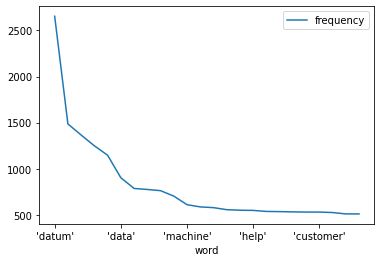

In [126]:
# plot to see visual
most_often.plot(x='word', y='frequency') 

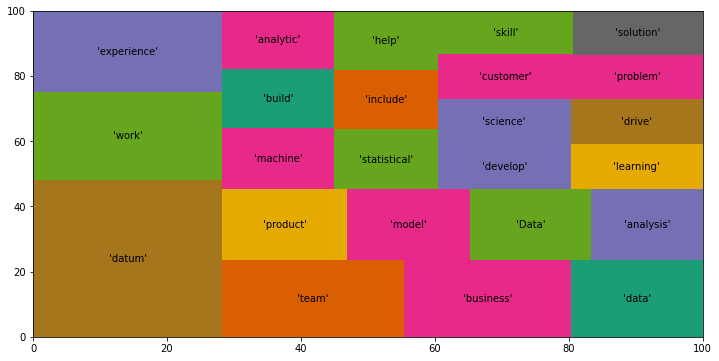

In [130]:
"""
This is a more informative graph!

Could be much better
"""

# start squarify plot
wc = most_often.frequency.to_list()

# labels 
label = list(most_often.word)

# color
np.random.seed(seed=25)
color = plt.cm.Dark2(np.random.rand(len(wc)))

#plot 
plt.figure(figsize=(12,6))
squarify.plot(sizes=wc, label=label, color=color)
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [159]:
##### Your Code Here #####

# hyper param tuning
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=2,
    ngram_range=(1,3)
)

dtm = tfidf.fit_transform(df['description']) # transform og df

dtm_df = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names()) # covert to matrix

print(dtm_df.shape)

dtm_df.head()

(426, 50394)


,000,000 125,000 125 000,000 350,000 350 000,000 associates,000 cities,000 cities suite,000 client,000 client locations,...,zf divisions functions,zf divisions functionstrong,zf organization,zf organization assure,zf platforms,zf platforms accelerate,zf portfolio,zf portfolio identify,zf positioning,zf positioning digital
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [152]:
##### Your Code Here #####

# making the model
from sklearn.neighbors import NearestNeighbors

nn_cv = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn_tfidf = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn_cv.fit(vectorized)
nn_tfidf.fit(dtm_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [153]:
# as nonsensical and void of meaning as a real job description
# still, i am looking for something along the lines of this
ideal_ds_job = '''
Machine Learning Engineer. Proficient in machine learning models and equally advanced, state of the art techniques. Individual has
deep understanding of domain knowledge pertaining to the field as well as sufficient wide breadth of understanding of new 
innovations that emerge. $150,000/yr. Develop pipelines for production, schemas for the Database and predictive models with real world
application.
'''

In [156]:
#

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 